In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../../Databases/train_task.csv')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
X = df.drop('price_range', axis=1)
y = df['price_range']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
param_grid = [
    {
        'penalty': ['l1'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear']
    },
    {
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    }
]

grid_search = GridSearchCV(LogisticRegression(max_iter=1000),
                           param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)


grid_search.fit(X_train_scaled, y_train)


best_model = grid_search.best_estimator_

print("Best param:", grid_search.best_params_)
print("Train Accuracy:", best_model.score(X_train_scaled, y_train))
print("Test Accuracy:", best_model.score(X_test_scaled, y_test))

Best param: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy: 0.9872222222222222
Test Accuracy: 0.99


In [8]:
model_l1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', max_iter=1000)
model_l1.fit(X_train_scaled, y_train)

y_train_pred_l1 = model_l1.predict(X_train_scaled)
print("L1 Train Accuracy:", accuracy_score(y_train, y_train_pred_l1))
print("L1 Train Classification Report:\n", classification_report(y_train, y_train_pred_l1))

y_test_pred_l1 = model_l1.predict(X_test_scaled)
print("L1 Test Accuracy:", accuracy_score(y_test, y_test_pred_l1))
print("L1 Test Classification Report:\n", classification_report(y_test, y_test_pred_l1))

L1 Train Accuracy: 0.8788888888888889
L1 Train Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       441
           1       0.80      0.75      0.77       451
           2       0.78      0.78      0.78       455
           3       0.97      1.00      0.98       453

    accuracy                           0.88      1800
   macro avg       0.88      0.88      0.88      1800
weighted avg       0.88      0.88      0.88      1800

L1 Test Accuracy: 0.885
L1 Test Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        59
           1       0.83      0.69      0.76        49
           2       0.73      0.82      0.77        45
           3       0.98      1.00      0.99        47

    accuracy                           0.89       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.89      0.89      0.88       200



In [9]:
model_l2 = LogisticRegression(penalty='l2', C=100, solver='lbfgs', max_iter=1000)
model_l2.fit(X_train_scaled, y_train)

y_train_pred_l2 = model_l2.predict(X_train_scaled)
print("L2 Train Accuracy:", accuracy_score(y_train, y_train_pred_l2))
print("L2 Train Classification Report:\n", classification_report(y_train, y_train_pred_l2))

y_test_pred_l2 = model_l2.predict(X_test_scaled)
print("L2 Test Accuracy:", accuracy_score(y_test, y_test_pred_l2))
print("L2 Test Classification Report:\n", classification_report(y_test, y_test_pred_l2))

L2 Train Accuracy: 0.9872222222222222
L2 Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       441
           1       0.99      0.98      0.99       451
           2       0.98      0.98      0.98       455
           3       0.99      0.99      0.99       453

    accuracy                           0.99      1800
   macro avg       0.99      0.99      0.99      1800
weighted avg       0.99      0.99      0.99      1800

L2 Test Accuracy: 0.99
L2 Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        49
           2       0.98      0.98      0.98        45
           3       0.98      0.98      0.98        47

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



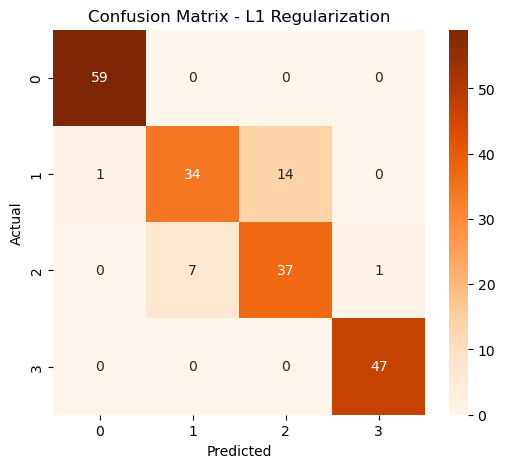

In [10]:
cm_l1 = confusion_matrix(y_test, y_test_pred_l1)
plt.figure(figsize=(6,5))
sns.heatmap(cm_l1, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - L1 Regularization")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

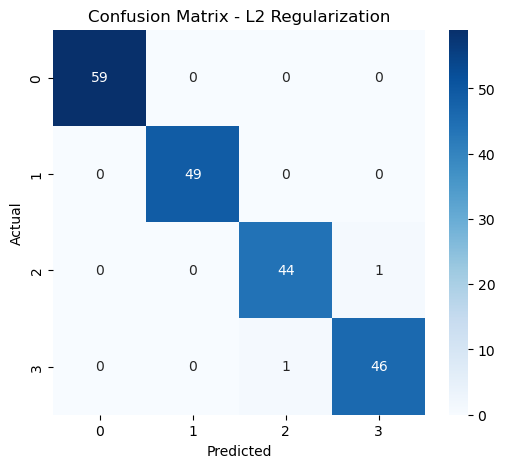

In [11]:
cm_l2 = confusion_matrix(y_test, y_test_pred_l2)
plt.figure(figsize=(6,5))
sns.heatmap(cm_l2, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - L2 Regularization")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

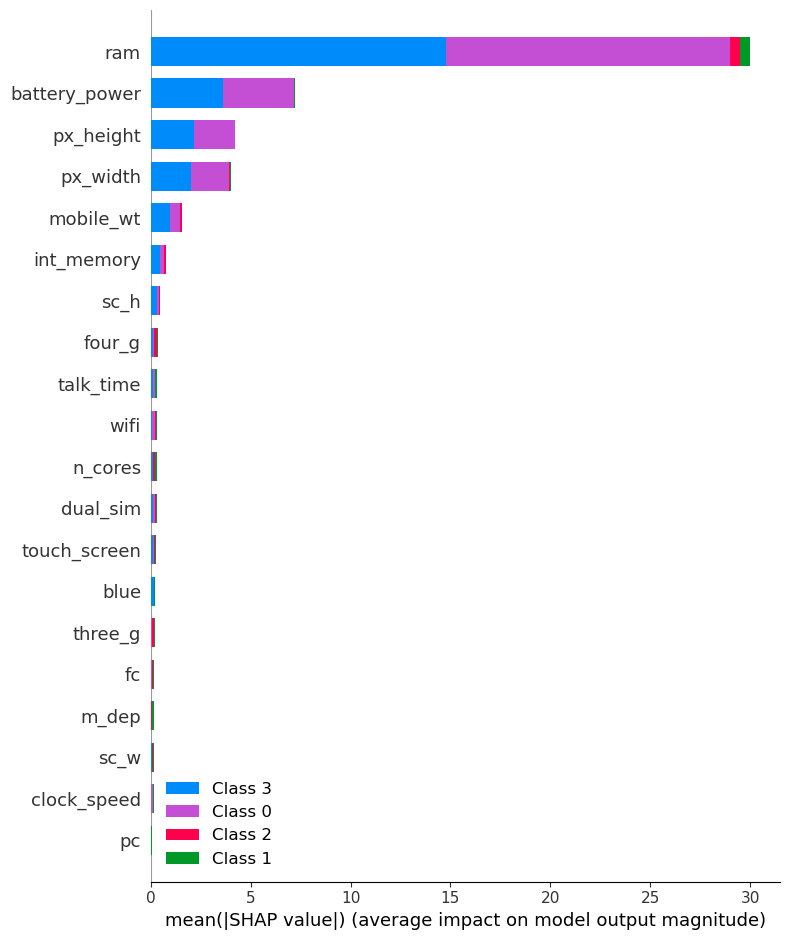

In [12]:
import shap

sample_X = X_test_scaled[:100]  

explainer_l1 = shap.Explainer(model_l1, X_train_scaled, feature_names=X_train.columns)
shap_values = explainer_l1(sample_X)

shap.summary_plot(shap_values, sample_X, feature_names=X_train.columns)

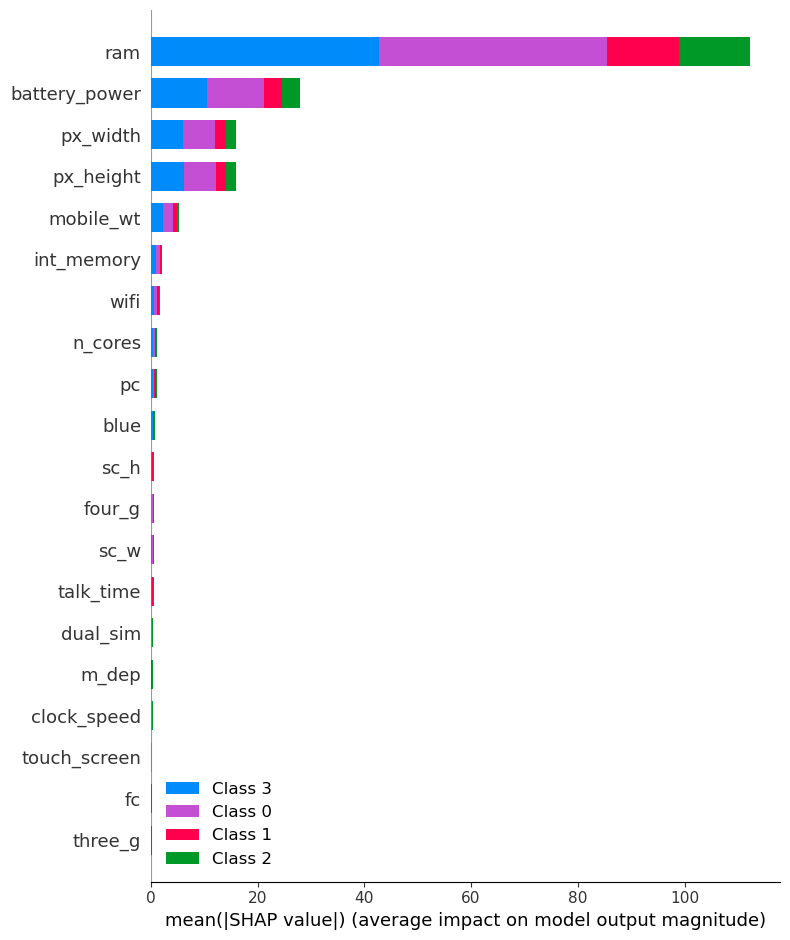

In [13]:
explainer_l2 = shap.Explainer(model_l2, X_train_scaled, feature_names=X_train.columns)

shap_values = explainer_l2(sample_X)

shap.summary_plot(shap_values, sample_X, feature_names=X_train.columns)